#  Final Project 2 Kelompok 1

## Anggota Kelompok :
- Natalie Novenrodumetasa PYTN-KS09-001 
- Audi Mayori PYTN-KS09-011 
- Nurianti Ahmad PYTN-KS09-021 

## A. Introduction

Dataset yang digunakan berisi data tentang cuaca harian di Australia selama 10 tahun dari berbagai daerah yang berada di Australia. 

Dari dataset tersebut akan diprediksi apakah hujan di hari besok menggunakan klasifikasi model logistic regression dan svm dengan target variabel yaitu RainTomorrow. 

## B. Import Libaries

In [1]:
# Import library yang akan digunakan

import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# C. Read CSV

In [2]:
# Membaca dataset

df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# D. Data Cleaning

Sebelum melakukan EDA, terlebih dahulu data akan dicek kolom apa saja yang kira-kira akan digunakan, tipe data kolomnya sudah benar atau belum, apakah ada missing value, dan apakah akan ditambah kolom yang baru.

In [3]:
# Mengecek tipe data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df[list(df.select_dtypes(include='object'))].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [5]:
# Mengubah tipe data menjadi datetime

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [6]:
# Mengubah tipe data object menjadi kategori

obj_col_list = df.columns[df.dtypes == 'object'].to_list()
for col in obj_col_list:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  category      
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  category      
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  category      
 10  WindDir3pm     141232 non-null  category      
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [7]:
# Mengecek missing value pada data

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [8]:
# Menghapus data yang tidak dipakai

df.drop('Date', axis = 1, inplace = True)
df.drop('Evaporation', axis = 1, inplace = True)
df.drop('Sunshine', axis = 1, inplace = True)
df.drop('Cloud9am', axis = 1, inplace = True)
df.drop('Cloud3pm', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [9]:
df.dropna(inplace=True, axis=0)

In [10]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

# E. EDA & Visualization

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,year,month,day
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,40.786611,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,2012.753385,6.431499,15.714678
std,6.254135,6.982702,8.602968,13.321774,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,2.530203,3.476314,8.790323
min,-8.200000,2.600000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,2007.000000,1.000000,1.000000
25%,8.100000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,2011.000000,3.000000,8.000000
50%,12.400000,23.100000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,2013.000000,6.000000,16.000000
75%,17.200000,28.700000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [12]:
df['RainToday'] = df['RainToday'].replace({1:'Yes',0:'No'})
df['RainTomorrow'] = df['RainTomorrow'].replace({1:'Yes',0:'No'})

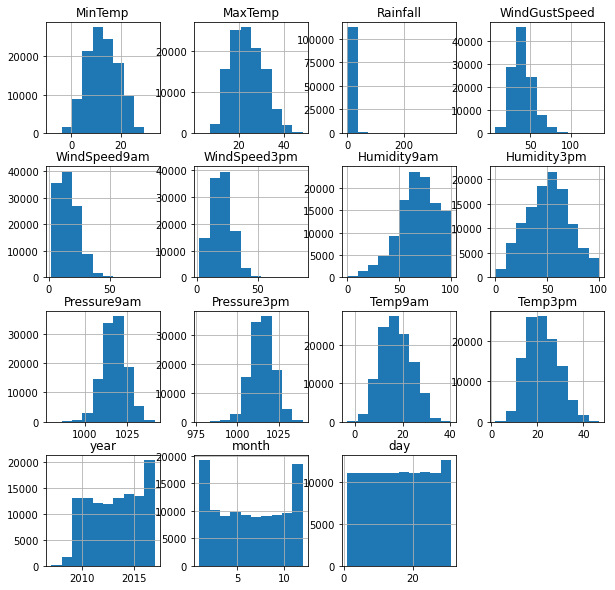

In [13]:
# Histogram data
df.hist(figsize=(10,10))
plt.show()

In [14]:
df_temp = df[['Location','MinTemp','MaxTemp']].groupby('Location').mean()
df_temp

,MinTemp,MaxTemp
Location,,
Adelaide,12.850255,23.068540
Albany,NaN,NaN
Albury,10.376926,23.411557
AliceSprings,13.688484,29.588047
BadgerysCreek,11.579092,24.238775
Ballarat,7.436440,18.340925
Bendigo,8.998231,22.017213
Brisbane,16.410828,26.463874
Cairns,21.194619,29.534253


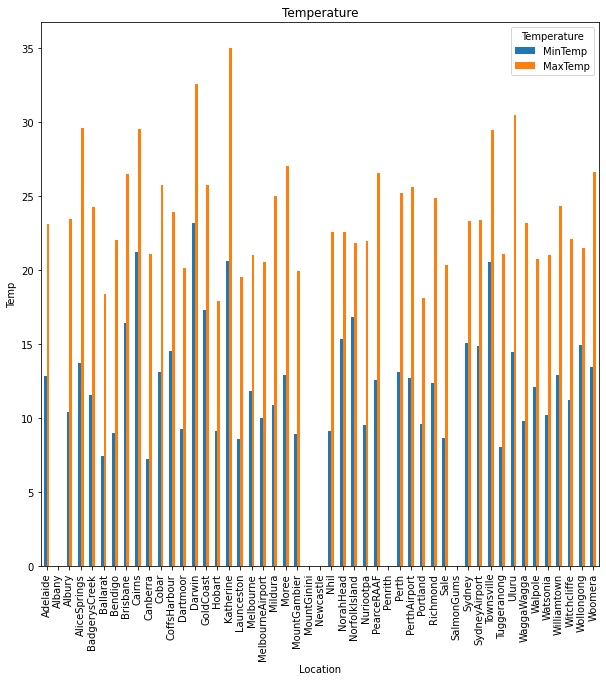

In [15]:
# visualisasi temperature berdasarkan lokasi

df_temp.plot(kind='bar', figsize=(10, 10))
plt.legend(title='Temperature')
plt.title('Temperature')
plt.ylabel('Temp')
plt.xlabel('Location')
plt.show()

Daerah yang memiliki rata-rata temperature tertinggi yaitu Katherine dan daerah yang memiliki rata-rata temperature terendah yaitu Canberra

In [16]:
# Kecepatan angin disetiap lokasi
df_wind = df[['Location','WindGustSpeed']].groupby('Location').mean().sort_values(by='WindGustSpeed', ascending=False)
df_wind

,WindGustSpeed
Location,
Hobart,47.787957
SydneyAirport,47.246842
MelbourneAirport,47.220859
Wollongong,46.070835
Melbourne,45.625616
Ballarat,45.551857
PerthAirport,44.359904
Woomera,44.155232
PearceRAAF,43.777868


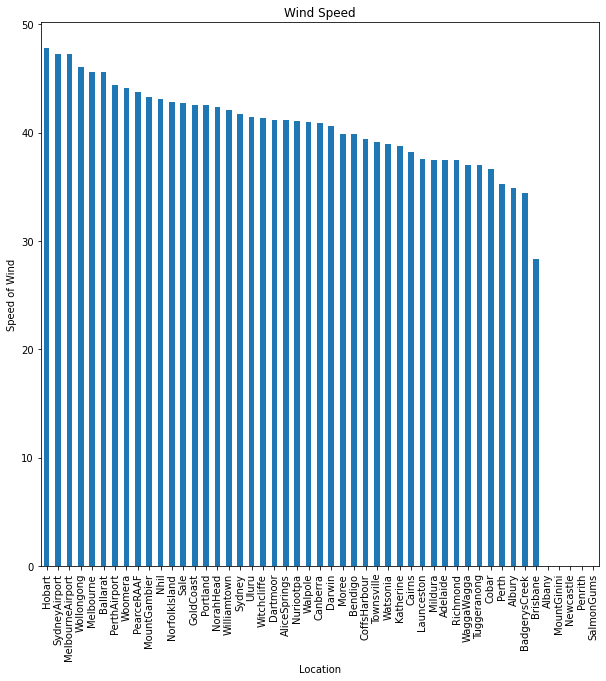

In [17]:
# Visualisasi kecepatan angin disetiap lokasi

df_wind.plot(kind='bar', figsize=(10, 10), legend=None)
plt.title('Wind Speed')
plt.ylabel('Speed of Wind')
plt.xlabel('Location')
plt.show()

Dapat dilihat dari bar diatas bahwa daerah Hobart mempunyai rata-rata kecepatan angin tertinggi diantara daerah yang lainnya

- Correlation

Akan dilakukan visualisasi korelasi variabel untuk melihat korelasi dari setiap variabel terhadap variabel RainTomorrow

In [18]:
# Korelasi variabel bertipe category

category_column = [ "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow"]

df_category = df[category_column]

df_category.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [19]:
LE = LabelEncoder()

df_category["Location"] = LE.fit_transform(df_category["Location"])
df_category["WindGustDir"] = LE.fit_transform(df_category["WindGustDir"])
df_category["WindDir9am"] = LE.fit_transform(df_category["WindDir9am"])
df_category["WindDir3pm"] = LE.fit_transform(df_category["WindDir3pm"])
df_category["RainToday"] = LE.fit_transform(df_category["RainToday"])
df_category["RainTomorrow"] = LE.fit_transform(df_category["RainTomorrow"])

df_category.head()

C:\Users\Natalie Ocha\AppData\Local\Temp\ipykernel_12396\890012679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category["Location"] = LE.fit_transform(df_category["Location"])
C:\Users\Natalie Ocha\AppData\Local\Temp\ipykernel_12396\890012679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category["WindGustDir"] = LE.fit_transform(df_category["WindGustDir"])
C:\Users\Natalie Ocha\AppData\Local\Temp\ipykernel_12396\890012679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1,13,13,14,0,0
1,1,14,6,15,0,0
2,1,15,13,15,0,0
3,1,4,9,0,0,0
4,1,13,1,7,0,0


In [20]:
corr_category = df_category.corr()
corr_category

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Location,1.000000,0.032909,-0.019989,0.022470,-0.000757,-0.000367
WindGustDir,0.032909,1.000000,0.403542,0.601054,0.137906,0.051767
WindDir9am,-0.019989,0.403542,1.000000,0.305955,0.174094,0.029832
WindDir3pm,0.022470,0.601054,0.305955,1.000000,0.126229,0.026099
RainToday,-0.000757,0.137906,0.174094,0.126229,1.000000,0.315359
RainTomorrow,-0.000367,0.051767,0.029832,0.026099,0.315359,1.000000


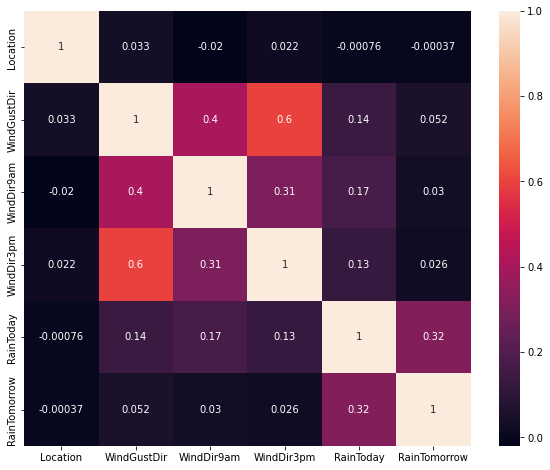

In [21]:
# Visualisasi plot

plt.figure(figsize=(10,8))
sns.heatmap(df_category.corr(), annot=True)
plt.show()

In [22]:
# Korelasi variabel bertipe numerik
numeric_col = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "RainTomorrow"
]

df_numeric = df[numeric_col]

LE = LabelEncoder()
df_numeric["RainTomorrow"] = LE.fit_transform(df_numeric["RainTomorrow"])


df_numeric.head()

C:\Users\Natalie Ocha\AppData\Local\Temp\ipykernel_12396\4231585325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["RainTomorrow"] = LE.fit_transform(df_numeric["RainTomorrow"])


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [23]:
corr_numeric = df_numeric.corr()

corr_numeric

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.728942,0.103807,0.159176,0.150577,0.146078,-0.218312,0.026733,-0.433645,-0.448298,0.898785,0.704477,0.078691
MaxTemp,0.728942,1.000000,-0.076825,0.056742,-0.006114,0.013976,-0.517188,-0.497679,-0.312597,-0.411360,0.884925,0.984357,-0.168872
Rainfall,0.103807,-0.076825,1.000000,0.130388,0.085376,0.060288,0.238756,0.259652,-0.167595,-0.126520,0.007418,-0.080376,0.238379
WindGustSpeed,0.159176,0.056742,0.130388,1.000000,0.589735,0.679223,-0.183729,-0.020903,-0.445046,-0.399751,0.124733,0.018325,0.238664
WindSpeed9am,0.150577,-0.006114,0.085376,0.589735,1.000000,0.499372,-0.221500,-0.017875,-0.201550,-0.150433,0.089493,-0.019280,0.093173
WindSpeed3pm,0.146078,0.013976,0.060288,0.679223,0.499372,1.000000,-0.093364,0.053916,-0.284036,-0.244390,0.126778,-0.011471,0.096277
Humidity9am,-0.218312,-0.517188,0.238756,-0.183729,-0.221500,-0.093364,1.000000,0.684373,0.115345,0.168052,-0.464487,-0.510028,0.276704
Humidity3pm,0.026733,-0.497679,0.259652,-0.020903,-0.017875,0.053916,0.684373,1.000000,-0.035468,0.046073,-0.202107,-0.547120,0.455945
Pressure9am,-0.433645,-0.312597,-0.167595,-0.445046,-0.201550,-0.284036,0.115345,-0.035468,1.000000,0.960248,-0.400133,-0.270662,-0.243702
Pressure3pm,-0.448298,-0.411360,-0.126520,-0.399751,-0.150433,-0.244390,0.168052,0.046073,0.960248,1.000000,-0.453075,-0.378574,-0.224142


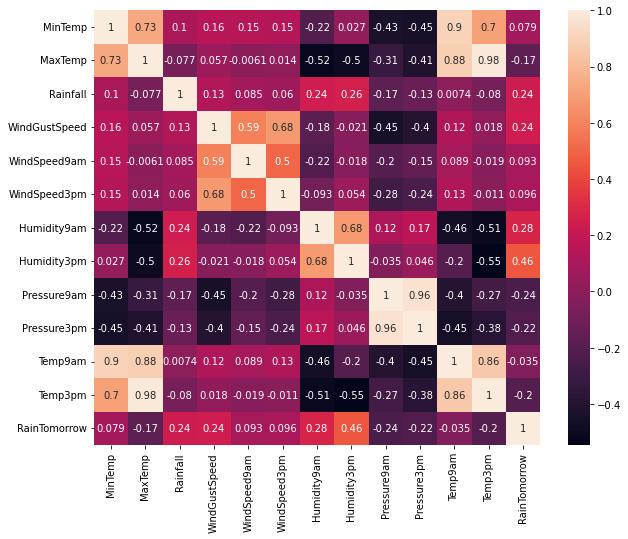

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

Dari hasil korelasi yang sudah dilakukan, 5 fitur yang memiliki korelasi tertinggi yaitu :
- Rain tomorrow
- Rainfall
- WindGustSpeed
- Humadity9am
- Humadity3pm
- Rain today

## F. Data Preprocessing

Membuat data frame baru dengan variabel yang akan digunakan lalu membagi data menjadi train-dev-test, dan transformasi data

In [25]:
# Membuat data frame baru
df_new = pd.DataFrame(df[['RainTomorrow', 'RainToday','WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
            'Rainfall']])

df_new.head()

,RainTomorrow,RainToday,WindGustSpeed,Humidity9am,Humidity3pm,Rainfall
0,No,No,44.0,71.0,22.0,0.6
1,No,No,44.0,44.0,25.0,0.0
2,No,No,46.0,38.0,30.0,0.0
3,No,No,24.0,45.0,16.0,0.0
4,No,No,41.0,82.0,33.0,1.0


berdasarkan tabel diatas, dapat dilihat bahwa data terbaru berisi 6 kolom yang akan digunakan untuk pemodelan Logistic Regression

In [26]:
#encode data kategorik menjadi numerik

label = LabelEncoder()
df_new['RainTomorrow'] = label.fit_transform(df_new['RainTomorrow'])
df_new['RainToday'] = label.fit_transform(df_new['RainToday'])

In [27]:
df_new.head()

,RainTomorrow,RainToday,WindGustSpeed,Humidity9am,Humidity3pm,Rainfall
0,0,0,44.0,71.0,22.0,0.6
1,0,0,44.0,44.0,25.0,0.0
2,0,0,46.0,38.0,30.0,0.0
3,0,0,24.0,45.0,16.0,0.0
4,0,0,41.0,82.0,33.0,1.0


In [28]:
df_new.dtypes

RainTomorrow       int32
RainToday          int32
WindGustSpeed    float64
Humidity9am      float64
Humidity3pm      float64
Rainfall         float64
dtype: object

In [29]:
# Membuat variabel, set train dan train yang akan digunakan pada pemodelan nanti

x = df_new.drop(columns=['RainTomorrow'])
y = df_new['RainTomorrow']

# Melakukan splitting data dengan proporsi 0.7 dan 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [30]:
# Standarisasi Data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

## G. Model Definition

In [31]:
# Logistic Regression
logres = LogisticRegression()
logres.fit(x_train, y_train)

LogisticRegression()

In [32]:
# Support Vector Machine

SVM_model = SVC()
SVM_model.fit(x_train, y_train)

SVC()

## H. Training Model 

In [33]:
# Logistic Regression
lr_pred = logres.predict(x_test)

print("Accuracy Score: ", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy Score:  0.8440285731152961
[[25070  1378]
 [ 3906  3524]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     26448
           1       0.72      0.47      0.57      7430

    accuracy                           0.84     33878
   macro avg       0.79      0.71      0.74     33878
weighted avg       0.83      0.84      0.83     33878



In [34]:
# Support Vector Machine
pred_svm = SVM_model.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

Accuracy Score: 0.8465080583269379
[[25515   933]
 [ 4267  3163]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     26448
           1       0.77      0.43      0.55      7430

    accuracy                           0.85     33878
   macro avg       0.81      0.70      0.73     33878
weighted avg       0.84      0.85      0.83     33878



## I. Model Evaluation

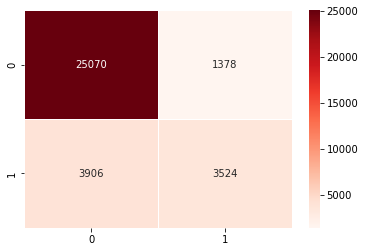

In [35]:
# Visualisasi Matriks Logistic Regression

lr_cm = confusion_matrix(y_test,lr_pred )
sns.heatmap(lr_cm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

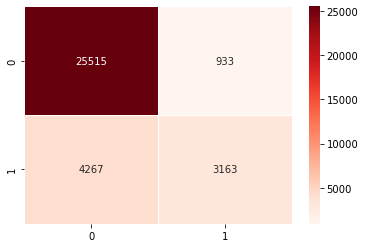

In [36]:
# Visualisasi Matriks SVM

svm_cm = confusion_matrix(y_test,pred_svm )
sns.heatmap(svm_cm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

## K. Conclusion

In [37]:
print("Accuracy Score Logistic Regression : ", accuracy_score(y_test, lr_pred))
print("Accuracy Score SVM :", accuracy_score(y_test, pred_svm))

Accuracy Score Logistic Regression :  0.8440285731152961
Accuracy Score SVM : 0.8465080583269379


Dapat dilihat dari hasil akurasi diatas bahwa model SVM lebih baik digunakan karena mendapatkan nilai akurasi lebih tinggi dibandingkan dengan Logistic Regression